In [1]:
! pip install pip install -U sentence-transformers

     |████████████████████████████████| 2.1 MB 901 kB/s            
     |████████████████████████████████| 79 kB 5.4 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120748 sha256=ac375320710d16d9be6c6ff1c1df8c40a915042c37142f55bf0bae5dea6588bf
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1


In [2]:
import pandas as pd
import numpy as np 
df = pd.read_csv('../input/phone-reviews/phone_reviews.csv')
df.head()

,asin,review_title,review_body,stars
0,B08697N43G,"[""Don't buy this phone"", 'One of the good choi...","[""\n Both 13 MP and 5MP Camera quality is goo...","['1.0 out of 5 stars', '4.0 out of 5 stars', '..."
1,B085J168WR,['Cutting corners from global Mi11 series and ...,['\n Please be aware that this is a downgrade...,"['2.0 out of 5 stars', '5.0 out of 5 stars', '..."
2,B0948NNY3W,"['Worst Phone Dont Buy', 'I request that pleas...",['\n Worst Phone I have seen specs amd buyed ...,"['1.0 out of 5 stars', '3.0 out of 5 stars', '..."
3,B095PYTSV8,"['Bakwas phone', 'After replacement..now bette...","['\n Bakwas phone\n', ""\n Few issues are res...","['1.0 out of 5 stars', '3.0 out of 5 stars', '..."
4,B097RD2JX8,['Waste of hard earned money - buy only if you...,['\n In my first review given within 24 hrs l...,"['1.0 out of 5 stars', '5.0 out of 5 stars', '..."


In [3]:
asin_rev_title_dict = {}
asin_review_dict = {}
title , body, stars= [] ,[] , []
for idx , lis in enumerate(df['review_title'].apply(eval)):
    title.extend(lis)
    asin_rev_title_dict[df.loc[idx,'asin']] = lis
for idx , lis in enumerate(df['review_body'].apply(eval)):
    body.extend(lis)
    asin_review_dict[df.loc[idx,'asin']] = lis
for lis in df['stars'].apply(eval):
    stars.extend(lis)
p_review = title + body

In [4]:
asin_list, title_list, body_list  , stars_list =  [] , [] , [], []
for idx , lis in enumerate(df['review_title'].apply(eval)):
    asin_list.extend([df.loc[idx,'asin']]*len(lis))
    title_list.extend(lis)
for idx , lis in enumerate(df['review_body'].apply(eval)):
    body_list.extend(lis)
for idx , lis in enumerate(df['stars'].apply(eval)):
    stars_list.extend(lis)

In [5]:
review_df_asins = pd.DataFrame({'asin': asin_list, 'title':title_list, 'body':body_list, 'stars':stars_list})
print(review_df_asins.shape)
review_df_asins.head()

(83770, 4)


,asin,title,body,stars
0,B08697N43G,Don't buy this phone,\n Both 13 MP and 5MP Camera quality is good....,1.0 out of 5 stars
1,B08697N43G,One of the good choice for low budget phone,\n If you are looking for low budget phone th...,4.0 out of 5 stars
2,B08697N43G,Simply excellent. Read complete review written...,\n Excellent mobile for daily use @7500/-. Do...,5.0 out of 5 stars
3,B08697N43G,Amezing One,"\n If I started to rating it's all features, ...",5.0 out of 5 stars
4,B08697N43G,Poor,\n Battery is getting drained out quite fast....,1.0 out of 5 stars


In [6]:
review_df_asins.to_csv('review_df_asins.csv', index = False)

In [7]:
r_df = review_df_asins.drop_duplicates('body').reset_index(drop = True)  # droping duplicates --review body from dataframe

In [8]:
title_body = list(r_df.title.values) +  list(r_df.body.values)  # concatenating both reviews and review body 

In [9]:
print(f'total reviews: {len(title_body)}\nrepeated_reviews: {len(title_body) - len(set(title_body))}')
p_review1 = list(set(title_body))
print('length of review list after removing duplicates:', len(p_review1))

total reviews: 61610
repeated_reviews: 6178
length of review list after removing duplicates: 55432


In [10]:
import re 

def preprocess(phrase):
    """ Given a phrase function 
    returns the processed phrase """
    
    phrase = re.sub(r"\n", " ", phrase)   # removes newline 
    phrase = re.sub(r'\.\.+', ' .', phrase) # substitutes multiple fullstop to a single fullstop 
    phrase = phrase.lower()     # lower
    phrase = re.sub(r"the media could not be loaded", " ", phrase) # some reviews have this extra lines
    
    
    #decontractions 
    phrase = re.sub(r"won't", " will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r" n ", " and ", phrase)
    phrase = re.sub(r" phn ", "phone", phrase)
    return phrase

rv1 = list(map(preprocess, p_review1))   

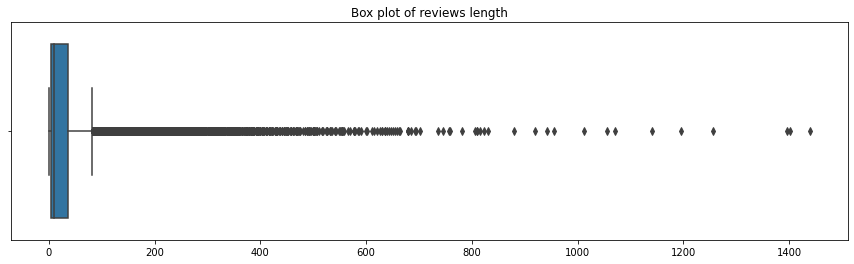

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
length_reviews = list(map(lambda x :len(x.split()) , rv1))
df = pd.DataFrame(length_reviews)
plt.figure(figsize = [15, 4])
sns.boxplot(x = length_reviews)
plt.title('Box plot of reviews length')
plt.show()

In [12]:
rv1[700:705]

['   before writing the review i want to tell you that i am not a promoter of samsung phones and to be honest i did not liked the j series at all. but when it comes to this model, samsung has changed each and every bit of it and made this phone a completely different one. i used to watch the reviews of this model and they told that even though the overall performance is good, it is not up to the mark when it comes to gaming. but believe me this one works really well for pubg and there are no problems yet (4gb 64gb). the user interface is absolutely gorgeous. and the samoled screen gives you a tremendous picture quality. the only thing that i am not satisfied about is the 6000 mah battery. i think it is a made up figure. it actually does the same that a 5000 mah can provide. but in overall after using it for last 3 months i can assure you that it is worth for the money. i got it for 12699 which gives me extra satisfaction. ',
 '   phone running smoodhly .camera is too good .👌 not so muc

In [13]:
# splits the lists with fullstop as a criterion 
rv2 = []
rv3 = []
for rv in rv1:    
    rv_split = rv.split('.')
    rv2 +=rv_split

rv2 = list(set(list(filter(lambda x: len(x.split()) >2 , rv2))))  # removes string with less than 2 words
    
for rv in rv2:    
    rv_split = rv.split(',')
    rv3 +=rv_split

def ascii_check(sentence):
    new_sent = []
    for word in sentence.split():
        if word.isascii():
            new_sent.append(word)
    return ' '.join(new_sent)

rv3 = list(map(ascii_check , rv3))
rv3 = list(set(list(filter(lambda x: len(x.split()) >2 , rv3))))  # removes string with less than 2 words 

length_reviews_rv3 = list(map(lambda x :len(x.split()) , rv3)) # length of rv3 reviews 

In [14]:
print('length after splitting reviews by full stop, comma and after preprocessing ' , len(rv3))

length after splitting reviews by full stop, comma and after preprocessing  167175


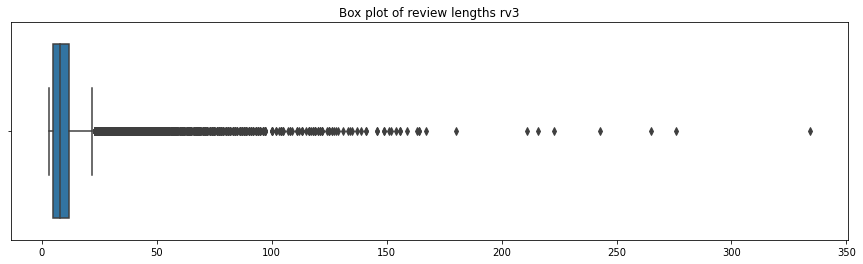

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns
length_reviews = list(map(lambda x :len(x.split()) , rv3))
df = pd.DataFrame(length_reviews)
plt.figure(figsize = [15, 4])
sns.boxplot(x = length_reviews)
plt.title('Box plot of review lengths rv3')
plt.show()

In [16]:
import os 
if not os.path.exists('../final_phase'):
    os.mkdir('../final_phase')
    print("make folder")
else:
    print("exists")

make folder


In [17]:
import re
details_df = pd.read_csv('../input/phase3-phone-details/phone_details_df.csv')
brands = [manu.split()[0] for manu in details_df.Manufacturer.values]
brands = list(map(lambda x: re.sub(r'[^a-zA-Z]+', ' ', x) , brands))
brands = list(map(str.strip , brands))
brand_names = list(map(str.lower , pd.Series(brands).value_counts().index))
brand_names

['redmi',
 'oppo',
 'samsung',
 'iqoo',
 'g',
 'apple',
 'xiaomi',
 'oppo',
 'vivo',
 'sky',
 'realme',
 'g mobile',
 'lava',
 'bhagwati',
 'lava',
 'rising',
 'jio',
 'motorola']

In [18]:
t = details_df.Title
t = list(map(lambda x: re.sub(r'\(.*\)', ' ', x) , t))
t = list(map(lambda x: re.sub(r'\|.*', ' ', x) , t))
t = list(map(lambda x: re.sub(r'-.*', ' ', x) , t))
t = list(map(lambda x: re.sub(r'  .*', ' ', x) , t))
t = list(map(lambda x: re.sub(r',.*', ' ', x) , t))
t = list(map(lambda x: re.sub(r' 5G.*', ' ', x) , t))
t = list(map(str.strip , t))
brand_words = list(set(pd.Series([tt.split() for tt in t]).sum())) + brand_names
brand_words = set([bw.lower() for bw in brand_words])
to_remove  = set(['phone', 'smartphone', 'core', 'brown', 'black', 'power', 'sport'] )
brand_words = list(filter(lambda x: len(x) >1 and x not in to_remove, brand_words))
print(brand_words)

['11t', '30', 'a52', 'ne', 'a1', 'jio', 'e7', 'plus', 'oneplus', 'g20', 'a31', 'iphone', 'camon', 'nokia', 'a15s', 'iqoo', 'x419', 'y73', '2021', 'micromax', 'y72', 'edition', 'max', 'tecno', 'c25y', 'c01', 'note', 'bhagwati', 'kall', '10t', 'cocoa', 'm52', 'y20t', 'vivo', '10s', '50i', 'prime', '9r', 'lite', 'z4', 'pova', '12', 'fe', 'pac', '50a', 'm32', '17', 'ce', 'y33t', 'a03', 'z5', 'a74', 'redmi', 'samsung', 'z3', 'lte', '8t', 'activ', '9a', '7t', 'go', 'y21', '4g', '8i', 'g mobile', 'realme', 'motorola', 'nord', '10', 'sky', 'a12', '11', 's21', '9rt', '11x', 'pro', 'narzo', 'mi', 'm21', 'xiaomi', 'rising', 'pop', 'lava', 'v21e', 's20', 'xr', '2022', 'oppo', 'spark', 'galaxy', 'apple']


In [19]:
def remove_brand_words(review, brand_words = brand_words):
    review = ' '.join(list(filter(lambda x : x not in brand_words, review.split())))
    return review

In [20]:
rv4 = list(map(remove_brand_words, rv3))
rv4 = list(set(rv4))

In [21]:
import pickle
with open('../final_phase/processed_reviews.pickle', 'wb') as f:
    pickle.dump(rv4, f)

In [22]:
import pickle
with open('../input/arch-all/processed_reviews.pickle', 'rb') as f:
    rv4= pickle.load(f)

In [23]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [24]:
embeddings = model.encode(rv4)

Batches:   0%|          | 0/4115 [00:00<?, ?it/s]

In [25]:
embeddings.shape

(131659, 384)

In [26]:
import pickle
with open('../final_phase/processed_reviews_emb.pickle', 'wb') as f:
    pickle.dump(embeddings, f) 

In [27]:
import pickle
with open('../input/arch-all/processed_reviews_emb_phase4.pickle', 'rb') as f:
    embeddings = pickle.load(f)

In [28]:
! pip install umap-learn
! pip install hdbscan

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=3413341 sha256=d55e80324cfbc3f10dbfe35767b

In [29]:
import umap
transform_function = umap.UMAP(random_state=42,  n_components=30).fit(embeddings)
# previously clusterable_embeddings  

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [30]:
with open('umap_fun.pickle','wb') as f:
    pickle.dump(transform_function , f)

In [31]:
len(rv4), len(embeddings)

(131659, 131659)

In [33]:
import umap
import hdbscan
import pandas as pd

#transform_function = umap.UMAP(random_state=42,  n_components=30).fit(embeddings)
#clusterable_embedding = transform_function.transform(embeddings)
#print(clusterable_embedding.shape)

clusterer = hdbscan.HDBSCAN(algorithm='best' , gen_min_span_tree=True ,  
    metric='l2', min_samples = 80 , min_cluster_size = 60
                            , prediction_data = True).fit(clusterable_embedding)

print('total clusters founded' , max(clusterer.labels_))
cluster_df = pd.DataFrame(rv4, columns = ['corpus'])
cluster_df['cluster'] = clusterer.labels_

cluster_df.head()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

,corpus,cluster
0,"it is totally worth every penny, it has camera...",69
1,worst phone with worst amazon service,-1
2,super compact stylish phone,-1
3,where the lower end and best value for money v...,175
4,"camera is good, battery lasts for 2",144


In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize = [15, 10])
# plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], c=clusterer.labels_, cmap='Spectral', s=5)
# plt.title('Clustering of review embeddings in 2d')
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize= [20,8])
clusterer.condensed_tree_.plot()

In [34]:
cluster_df['cluster'].value_counts()

-1      47538
 129     4063
 2       3881
 93      3267
 69      3053
        ...  
 109       63
 167       62
 37        60
 24        60
 160       60
Name: cluster, Length: 181, dtype: int64

In [35]:
with open('../final_phase/umap_fun.pickle','wb') as f:
    pickle.dump(transform_function , f)

with open('../final_phase/clust_emb.pickle', 'wb') as f:
    pickle.dump(clusterable_embedding, f)
with open('../final_phase/cluster_dataframe.pickle', 'wb') as f:
    pickle.dump(cluster_df, f)
# f.close()
with open('../final_phase/clusterer.pickle', 'wb') as f:
    pickle.dump(clusterer, f)
f.close()

In [ ]:
with open('../final_phase/', 'wb') as f:
    pd.read_csv('../input/phone-reviews/phone_reviews.csv')

In [ ]:
import pickle
#with open('../input/arch-all/clust_emb_phase3.pickle', 'rb') as f:
#    clust_emb = pickle.load(f)
#f.close()
# with open('../input/arch-all/cluster_dataframe.pickle', 'rb') as f:
#     cluster_df = pickle.load(f)
# f.close()
with open('../input/arch-all-a/clusterer.pickle', 'rb') as f:
    clusterer = pickle.load(f)
f.close()

In [ ]:
clusterer.get_params()

In [36]:
import shutil
shutil.make_archive('./arch_final_phase', 'zip', '../final_phase')

'/kaggle/working/arch_final_phase.zip'

In [ ]:
# import sys
# import matplotlib.pyplot as plt
# import seaborn as sns 
# sys.setrecursionlimit(1000)
# plt.figure(figsize = [10,10])
# clusterer.single_linkage_tree_.plot(truncate_mode = 'lastp' )
# import matplotlib.pyplot as plt 
# import seaborn as sns 
# clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
#                                       edge_alpha=0.3,
#                                       node_size=8,
#                                       edge_linewidth=0.5)

In [ ]:
#hdbscan.plots.MinimumSpanningTree(clusterer, clust_emb).plot()

In [ ]:
import numpy as np 
import pandas as pd 
#cluster_df = pd.read_csv('../input/cluster-df2/cluster_df2.csv')
cluster_df = cluster_df[['corpus', 'cluster']]

In [39]:
# #### from wordcloud import WordCloud   
# text = ' '.join(list(cluster_df[cluster_df['cluster'] ==4]['corpus'].values))
# # Generate a word cloud image
# wordcloud = WordCloud().generate(text)

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.figure(figsize = (10,10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

NameError: name 'WordCloud' is not defined

In [40]:
import re 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
add_stopwords = ['good', 'bad', 'best','awesome', 'also', 'great', 'better', 
                 'excellent', 'nice','worst','like', 'really', 'much', 'many', 'phone', 'mobile', 'use', 'buy', 'product']
stop_words += add_stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
def preprocess2(phrase):
    text = []
    phrase = re.sub('[^A-Za-z0-9]+', ' ', phrase)

    for word in phrase.split():
        if word not in stop_words:
            if len(word) > 1:
                from nltk.stem.snowball import SnowballStemmer
                stemmer = SnowballStemmer('english')
                text.append(stemmer.stem(word))
    return text

In [55]:
import gensim
from gensim.models import LdaModel
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
topics_list = []
n_cluster = max(cluster_df.cluster) 
from tqdm import tqdm
for clus in tqdm(list(range(0,n_cluster+1))):
    a = cluster_df[cluster_df['cluster'] == clus]['corpus'].values
    t = list(map(preprocess2 , a))

    common_dictionary = Dictionary(t)
    common_corpus = [common_dictionary.doc2bow(text) for text in t]
    lda = LdaModel(common_corpus, num_topics=3, id2word = common_dictionary)


    top_f = []
    for num , topics in lda.show_topics(formatted = False):
        top_f +=[top[0] for top in topics ][:]
    

    topics_list.append(list(set(top_f)))

100%|██████████| 180/180 [02:06<00:00,  1.43it/s]


In [56]:
import pandas as pd
df_topics2 = pd.DataFrame({'cluster': list(range( n_cluster+1)),  'topics':topics_list})

df_topics2[0:5]

,cluster,topics
0,0,"[ki, ye, se, nhi, nahi, bahut, ka, camera, ke,..."
1,1,"[fast, face, scanner, batteri, work, qualiti, ..."
2,2,"[overh, game, warm, problem, even, hot, use, c..."
3,3,"[far, perform, m31s, m51, batteri, upgrad, m30..."
4,4,"[one, f3, f1, option, compar, perform, previou..."


In [45]:
df_topics2.to_csv('../final_phase/cluster_lda_topics.csv')

In [28]:
import pandas as pd 
df_topics2 = pd.read_csv('../input/df-top1/df_top (1).csv')

In [31]:
#df = pd.read_csv('../input/final-p/final_p5.csv')

In [46]:
df_topics2

,cluster,topics
0,0,"[ki, se, nhi, nahi, ka, camera, ke, bhi, hi, h..."
1,1,"[unlock, time, sensor, work, print, fast, qual..."
2,2,"[time, problem, even, hot, use, camera, issu, ..."
3,3,"[differ, m30s, compar, perform, qualiti, use, ..."
4,4,"[one, price, f1, vs, f3, far, compar, perform,..."
...,...,...
175,175,"[vest, price, worth, rang, total, overal, perf..."
176,176,"[paid, price, penni, worth, everi, total, cost..."
177,177,"[one, prefer, would, without, definit, dont, c..."
178,178,"[one, wast, time, feel, work, totali, total, o..."


In [421]:
idx = 180
#df_topics2.loc[idx, 'aspects'] =  'none'  

print(idx, cluster_df[cluster_df['cluster'] == idx]['corpus'].shape)
df_topics2[idx:idx+1]['topics'].values, cluster_df[cluster_df['cluster'] == idx]['corpus'].values[50:]

180 (0,)


(array([], dtype=object), array([], dtype=object))

In [ ]:
df_final = df_topics2.dropna()

In [423]:
df_topics2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cluster  180 non-null    int64 
 1   topics   180 non-null    object
 2   aspects  180 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


In [424]:
df_topics2.to_csv('df_top.csv')  

In [ ]:
(df_topics2['aspects'] == 'proce').sum()

In [ ]:
df_topics2[df_topics2.aspects ==  'proce, worth , money']

In [ ]:
all_aspects = ','.join(list(df['aspects'].values)).split(',')
all_aspects = list(set(map(str.strip , all_aspects)))


In [ ]:
df = pd.read_csv("../input/topics-final/topics_df.csv")

In [ ]:
final_df_sentence = cluster_df.merge(df, how = 'left', on = 'cluster')

In [ ]:
final_df_sentence.to_csv('final_df_sentence.csv', index = False)

In [ ]:
aspects = list(map(str.strip, list(set(all_aspects))))
aspects = list(map(str.lower, aspects))
aspects = list(set(aspects))[1:]


In [ ]:
len(aspects)
df_final = cluster_df.merge(df_topics2, on = 'cluster', how = 'left')
df_final.dropna(axis = 0, inplace = True)

In [ ]:
df_topics2.to_csv('df_topics_phase4_final.csv', index = False)

In [ ]:
import pandas as pd
df_topics = pd.read_csv('../input/df-topics/phase3_df_topics.csv')

In [ ]:
import pandas as pd
df_topics2 = pd.read_csv('../input/phase-4-2/df_topics_phase4 (1).csv')

In [ ]:
df_topics.to_csv('phase3_df_topics_3.csv')

In [ ]:
import numpy as np 
import pandas as pd 
final_p = pd.read_csv('../input/final-p/final_p5.csv')
final_p.head()

In [ ]:
embeddings = model.encode(['battery is great and the performance is the best, camera is not so good', 'camera' ])

from scipy import spatial
result = 1 - spatial.distance.cosine(embeddings[0], embeddings[1])
result

In [ ]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")


model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

In [ ]:
! pip install -U textblob


In [ ]:
from textblob import TextBlob


In [ ]:
#c = df_final.sample(1)
#print(c.index)
#print(c.corpus.values[0], c.aspects.values)
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
nlp = pipeline('question-answering', model=model, tokenizer=tokenizer)
x = 'worth'
i = 107

y = rv4[i:i+1]
QA_input = {
    'question': f"how is the {x} ? ",
    'context': f'{y}'
}
res = nlp(QA_input)

res , sid.polarity_scores(y[0]), y , res['answer']



In [ ]:
blob = TextBlob(res['answer'])
for sentence in blob.sentences:
    print(sentence.sentiment)

In [ ]:
import nltk
nltk.download('vader_lexicon')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()


In [ ]:
c = df_final.iloc[[1896]]
print(c.index)
print(c.corpus.values[0], c.aspects.values)
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
nlp = pipeline('question-answering', model=model, tokenizer=tokenizer)
QA_input = {
    'question': f"how is the camera? ",
    'context':  c.corpus.values[0]
}
res = nlp(QA_input)
#res , c.aspects.values[0]

In [ ]:
max_ = 461
rnd = 375#np.random.randint(max_)
print(rnd , 'cluster number ')
r = cluster_df[cluster_df['cluster'] == rnd]['corpus'].values
len_r = r.shape[0]

#cluster_no = cluster_df.iloc[rnd]['cluster']
c = 78
print('r_no' , c  , len_r )
if cluster_no != -1:
    print(df_topics.iloc[rnd]['topics'])

from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline
nlp = pipeline('question-answering', model=model, tokenizer=tokenizer)
QA_input = {
    'question': "how is the brand ? ",
    'context':  r[c]
}
print(r[c])
res = nlp(QA_input)
res

In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)
QA_input = {
    'question': 'Why is model conversion important?',
    'context': 'The option to convert models between FARM and transformers gives freedom to the user and let people easily switch between frameworks.'
}
res = nlp(QA_input)

# b) Load model & tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)